In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [2]:
transaction = pd.read_csv("Transaction.csv")
purchase = pd.read_csv("Purchase.csv")

In [3]:
transaction.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
#Since the data type of date is integer, we need to change it to date format. 
#The integer value represents the number of days since a standard baseline date of 1900-01-01
transaction["DATE"] = pd.to_datetime(transaction.DATE,origin='1899-12-30', unit='D')

In [6]:
transaction.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
transaction.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [8]:
#We see that unqiue transaction ids are 263127 whereas total entries are 264836, so there are duplicate transactions in our dataset
transaction.TXN_ID.drop_duplicates(inplace=True)

In [9]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [10]:
#Let's look at the statistics of this dataset
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Here we can see that something is wrong since till the 75% percentile the value of PROD_QTY is 2 whereas its max value is 200. This means that there is an outlier in our data and we need to inspect it.

In [11]:
transaction[transaction.PROD_QTY == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


We can see that the same customer has placed order of the same chips of very large quantities. This does not look like an ordinary retail transaction, maybe it was a commercial purchase, so we can drop it from out dataset.

In [12]:
drop_cust = transaction[transaction.PROD_QTY == 200].index
transaction.drop(drop_cust, inplace = True)

In [13]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [14]:
#Explore transaction pattern over time with regards to sales
monthly_sales = transaction.resample("M", on = "DATE")["TOT_SALES"].sum()
monthly_sales

DATE
2018-07-31    165275.30
2018-08-31    158081.05
2018-09-30    160522.00
2018-10-31    164415.70
2018-11-30    160233.70
2018-12-31    167913.40
2019-01-31    162642.30
2019-02-28    150665.00
2019-03-31    166265.20
2019-04-30    159845.10
2019-05-31    156717.65
2019-06-30    160538.60
Freq: M, Name: TOT_SALES, dtype: float64

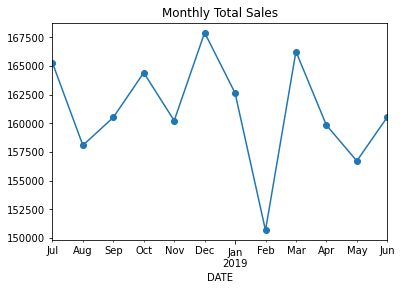

In [15]:
monthly_sales.plot(kind='line', marker='o', title='Monthly Total Sales')
plt.show()

We can see that there is a sharp increase in purchase of buiscuits in December which may be due to the holiday season. Also, we see that there is a sharp decline in sales in Feburary. Let's investigate further.

In [16]:
# Extract month and year from the 'Date' column
transaction['Month'] = transaction['DATE'].dt.month
transaction['Year'] = transaction['DATE'].dt.year

In [17]:
# Identify the months of interest
target_months = [11,12,1,2]  # December
target_month_data = transaction[transaction['Month'].isin(target_months)]

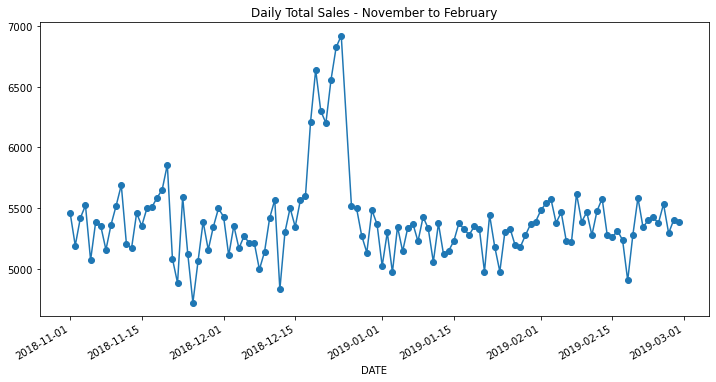

In [18]:
# Plot daily total sales for the target months
daily_sales = target_month_data.groupby('DATE')['TOT_SALES'].sum()
daily_sales.plot(kind='line', marker='o', figsize=(12, 6), title='Daily Total Sales - November to February')
plt.show()

We see an increase in sales in the weeks leading to Christmas and then a sudden decline in the week after Christmas. This could be due to public holidays during Christmas when the stores migt be closed. Also since the daily sales of the month Feburary seem pretty consistent with the daily sales of other months, we can say that the lower total sales in Feburary could be due to the fact that the sales were recorded only till 28th Feburary which is 2-3 days lesser than other months. 

In [19]:
# Identify best-selling products
best_selling_products = transaction.groupby(["PROD_NBR", "PROD_NAME"]).TOT_SALES.sum().sort_values(ascending=False)
#Print top 5 best selling products:
print("Top 5 best selling products are")
best_selling_products.head(10)

Top 5 best selling products are


PROD_NBR  PROD_NAME                               
4         Dorito Corn Chp     Supreme 380g            39052.0
14        Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
16        Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
102       Kettle Mozzarella   Basil & Pesto 175g      34457.4
7         Smiths Crinkle      Original 330g           34302.6
23        Cheezels Cheese 330g                        34296.9
20        Doritos Cheese      Supreme 330g            33390.6
89        Kettle Sweet Chilli And Sour Cream 175g     33031.8
46        Kettle Original 175g                        32740.2
32        Kettle Sea Salt     And Vinegar 175g        32589.0
Name: TOT_SALES, dtype: float64

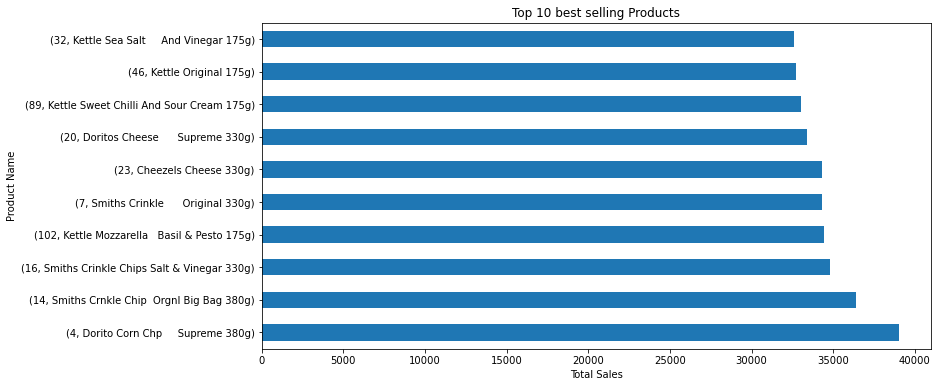

In [20]:
# Visualize the top 10 best-selling products
plt.figure(figsize=(12, 6))
best_selling_products.head(10).plot(kind='barh', x="PROD_NAME")
plt.title('Top 10 best selling Products')
plt.ylabel('Product Name')
plt.xlabel('Total Sales')
plt.show()

In [21]:
average_transaction_value = transaction.groupby('TXN_ID').TOT_SALES.sum().mean()
average_transaction_value

7.346755344416748

The average transaction value gives us insight into the typical amount spent per transaction.This metric is essential for understanding customer spending behavior and optimizing pricing strategies.

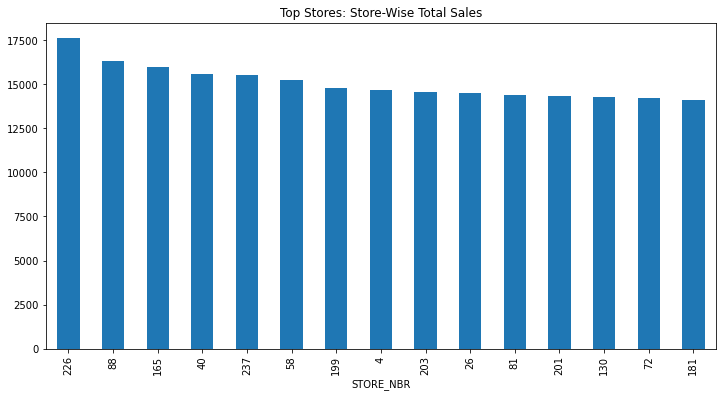

In [22]:
#Analyse the best performing store in terms of total sales
store_sales = transaction.groupby("STORE_NBR").TOT_SALES.sum().sort_values(ascending=False)
top_stores = store_sales.head(15)
top_stores.plot(kind='bar', figsize=(12, 6), title='Top Stores: Store-Wise Total Sales')
plt.show()

Since we have a large number of stores in our dataset, we will visualize only the top 15 stores in this graph and observe the best performing stores selling chips. Visualizing store performance helps identify top-performing and underperforming stores, informing strategic decisions. We should also look at underperforming stores, lets look at top 15 underperforming stores.

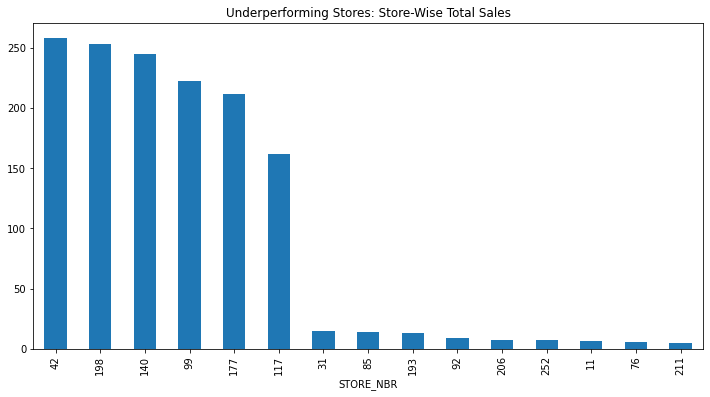

In [23]:
bottom_stores = store_sales.tail(15)
bottom_stores
bottom_stores.plot(kind='bar', figsize=(12, 6), title='Underperforming Stores: Store-Wise Total Sales')
plt.show()

Depending on the business need, we can define a threshold value of total sales and look at stores with lesser than that. 
Here we visualusized bottom 15 stores and we can see that there is a significant difference between bottom 9 and other stores.
This could be due to the fact that the data was not reported from these stores or a need to implement better stratgic decisions at these stores. Infact the last three stores 11,76 and 211

In [24]:
#Defining "packet-size" from the product name using regular expression to analyse the sizes of the chips packets
packet_size_pattern = r'(\d+g)'  #Assuming size is always followed by "g"
transaction["Packet_size"]=transaction.PROD_NAME.str.extract(packet_size_pattern)

In [25]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Month,Year,Packet_size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,10,2018,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,5,2019,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,5,2019,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,8,2018,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,8,2018,150g
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,3,2019,175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,8,2018,175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,11,2018,170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,12,2018,150g


In [26]:
transaction.Packet_size.unique()

array(['175g', '170g', '150g', '300g', '330g', '210g', nan, '270g',
       '220g', '125g', '110g', '134g', '380g', '180g', '165g', '135g',
       '250g', '200g', '160g', '190g', '90g', '70g'], dtype=object)

In [27]:
transaction[transaction.Packet_size == "nan"]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Month,Year,Packet_size


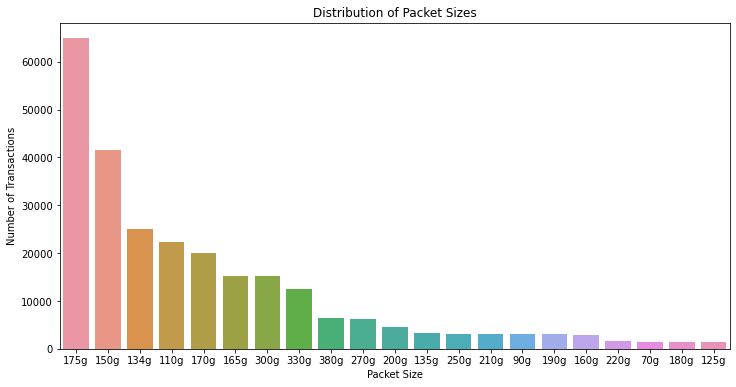

In [28]:
#Analyse distribution of packet size
plt.figure(figsize=(12, 6))
sns.countplot(x="Packet_size", data=transaction, order=transaction['Packet_size'].value_counts().index)
plt.title('Distribution of Packet Sizes')
plt.xlabel('Packet Size')
plt.ylabel('Number of Transactions')
plt.show()

We can see from the distribution of packet sizes that 175g is the most common pack size and 125g is the least. This analysis provides insights into the popularity of different packet sizes. But this is only based on the number of transactions made for each pack, we should also look at the sales of these packets sizes.

In [29]:
#Calculate avg total sales for each pack
avg_sale_by_packet_size=transaction.groupby(["Packet_size"]).TOT_SALES.mean().sort_values(ascending=False)
avg_sale_by_packet_size

Packet_size
380g    11.754925
330g    10.908636
270g     8.818679
250g     8.234995
135g     8.010562
300g     7.472676
175g     7.348217
170g     7.339889
110g     7.270532
150g     7.124389
134g     7.077344
210g     6.852163
165g     6.626175
180g     5.836785
190g     4.812321
70g      4.546782
220g     4.367647
125g     3.942916
160g     3.585051
200g     3.578694
90g      3.216888
Name: TOT_SALES, dtype: float64

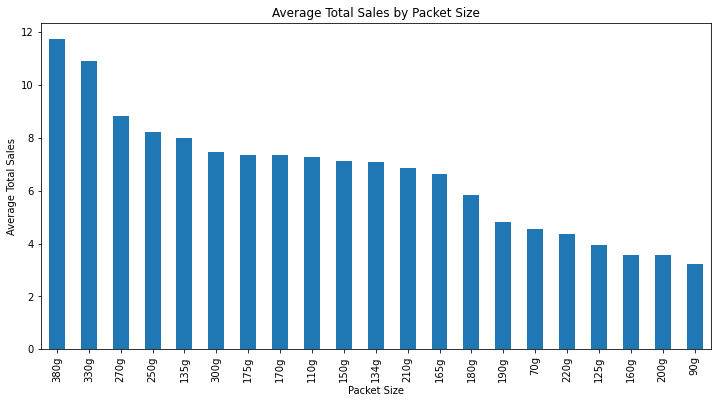

In [30]:
# Visualize average total sales by packet size
plt.figure(figsize=(12, 6))
avg_sale_by_packet_size.plot(kind='bar')
plt.title('Average Total Sales by Packet Size')
plt.xlabel('Packet Size')
plt.ylabel('Average Total Sales')
plt.show()

We do this analysis to understand the sales performance associated with different packet sizes.The avg total sales is maximum for a higher packet size of 380g which could be due to its higher price, likewise the avg sales of the smallest pack is least owing to its least cost. But it is interesting to see here that the 135g pack ranks higher in this graph than some of the bigger packs like 200g, 180g, 190g and even 175g pack which had the highest number of transactions.